In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline

Load the data from an existing CSV file

In [28]:
data = pd.read_csv("final_data.csv", index_col=0)

data.head()

,Price Target,positive,Date,Stock,negative,AAPL,ADBE,AMZN,BA,CMCSA,...,JEFFERIES,JPMORGAN,OPPENHEIMER AND CO,Volume,1 day,3 day,1 week,2 week,Accuracy Metric,Text
0,275.0,1.0,2019-11-21,AAPL,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1609800,17.729980,17.729980,22.160004,22.160004,NaN,"Technology | IT Hardware November 21, 2019 Am..."
1,275.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1459700,3.619995,6.559997,22.160004,22.160004,NaN,"Technology | IT Hardware November 17, 2019 Am..."
2,290.0,1.0,2019-11-17,AAPL,0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2011300,4.059997,0.619995,22.160004,22.160004,NaN,North America Equity Research 15 November 201...
3,280.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2762400,1.660004,2.610016,4.430024,10.990021,NaN,North America Equity Research 06 November 201...
4,262.0,1.0,2019-11-15,AAPL,0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2790200,8.730011,10.209991,9.709991,16.600006,NaN,"Technology | IT Hardware November 04, 2019 Am..."


Data exploration

In [29]:
print("The number of traning examples(data points) = %i " % data.shape[0])
print("The number of features we have = %i " % data.shape[1])

The number of traning examples(data points) = 3920 
The number of features we have = 42 


In [30]:
data.describe()

,Price Target,positive,negative,AAPL,ADBE,AMZN,BA,CMCSA,CSCO,CVX,...,EVERCORE ISI,JEFFERIES,JPMORGAN,OPPENHEIMER AND CO,Volume,1 day,3 day,1 week,2 week,Accuracy Metric
count,241.000000,1992.0,3920.0,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,...,1992.000000,1992.000000,1992.000000,1992.000000,3.920000e+03,3920.000000,3920.000000,3920.000000,3920.000000,2994.000000
mean,193.863527,1.0,0.0,0.120984,0.079317,0.060743,0.083333,0.095884,0.101908,0.072791,...,0.185241,0.245482,0.224398,0.090361,2.266282e+07,1.776463,1.765898,1.481633,1.817790,529.658630
std,51.482567,0.0,0.0,0.326190,0.270301,0.238918,0.276455,0.294505,0.302603,0.259859,...,0.388590,0.430481,0.417290,0.286771,2.327296e+07,112.008170,122.057643,140.818235,153.471250,904.280627
min,105.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.720000e+05,-1878.709961,-1879.259949,-1869.829956,-1862.889954,0.000000
25%,145.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.349400e+06,-1.622499,-1.499998,-1.682499,-1.862500,0.000000
50%,200.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.547620e+07,4.009999,5.229997,6.570002,8.135002,162.270068
75%,238.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.009488e+07,16.274998,19.870002,22.899994,27.867500,635.107525
max,296.000000,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.950827e+08,956.620056,917.519958,918.250000,1022.419982,7913.393460


In [31]:
data.isnull().sum()

Price Target          3679
positive              1928
Date                  1928
Stock                 1928
negative                 0
AAPL                  1928
ADBE                  1928
AMZN                  1928
BA                    1928
CMCSA                 1928
CSCO                  1928
CVX                   1928
DIS                   1928
FB                    1928
GOOGL                 1928
INTC                  1928
KO                    1928
LOW                   1928
MCD                   1928
MSFT                  1928
MU                    1928
NFLX                  1928
NKE                   1928
PEP                   1928
SBUX                  1928
T                     1928
TGT                   1928
VZ                    1928
WMT                   1928
XOM                   1928
MORGAN STANLEY        1928
EVERCORE ISI          1928
JEFFERIES             1928
JPMORGAN              1928
OPPENHEIMER AND CO    1928
Volume                   0
1 day                    0
3

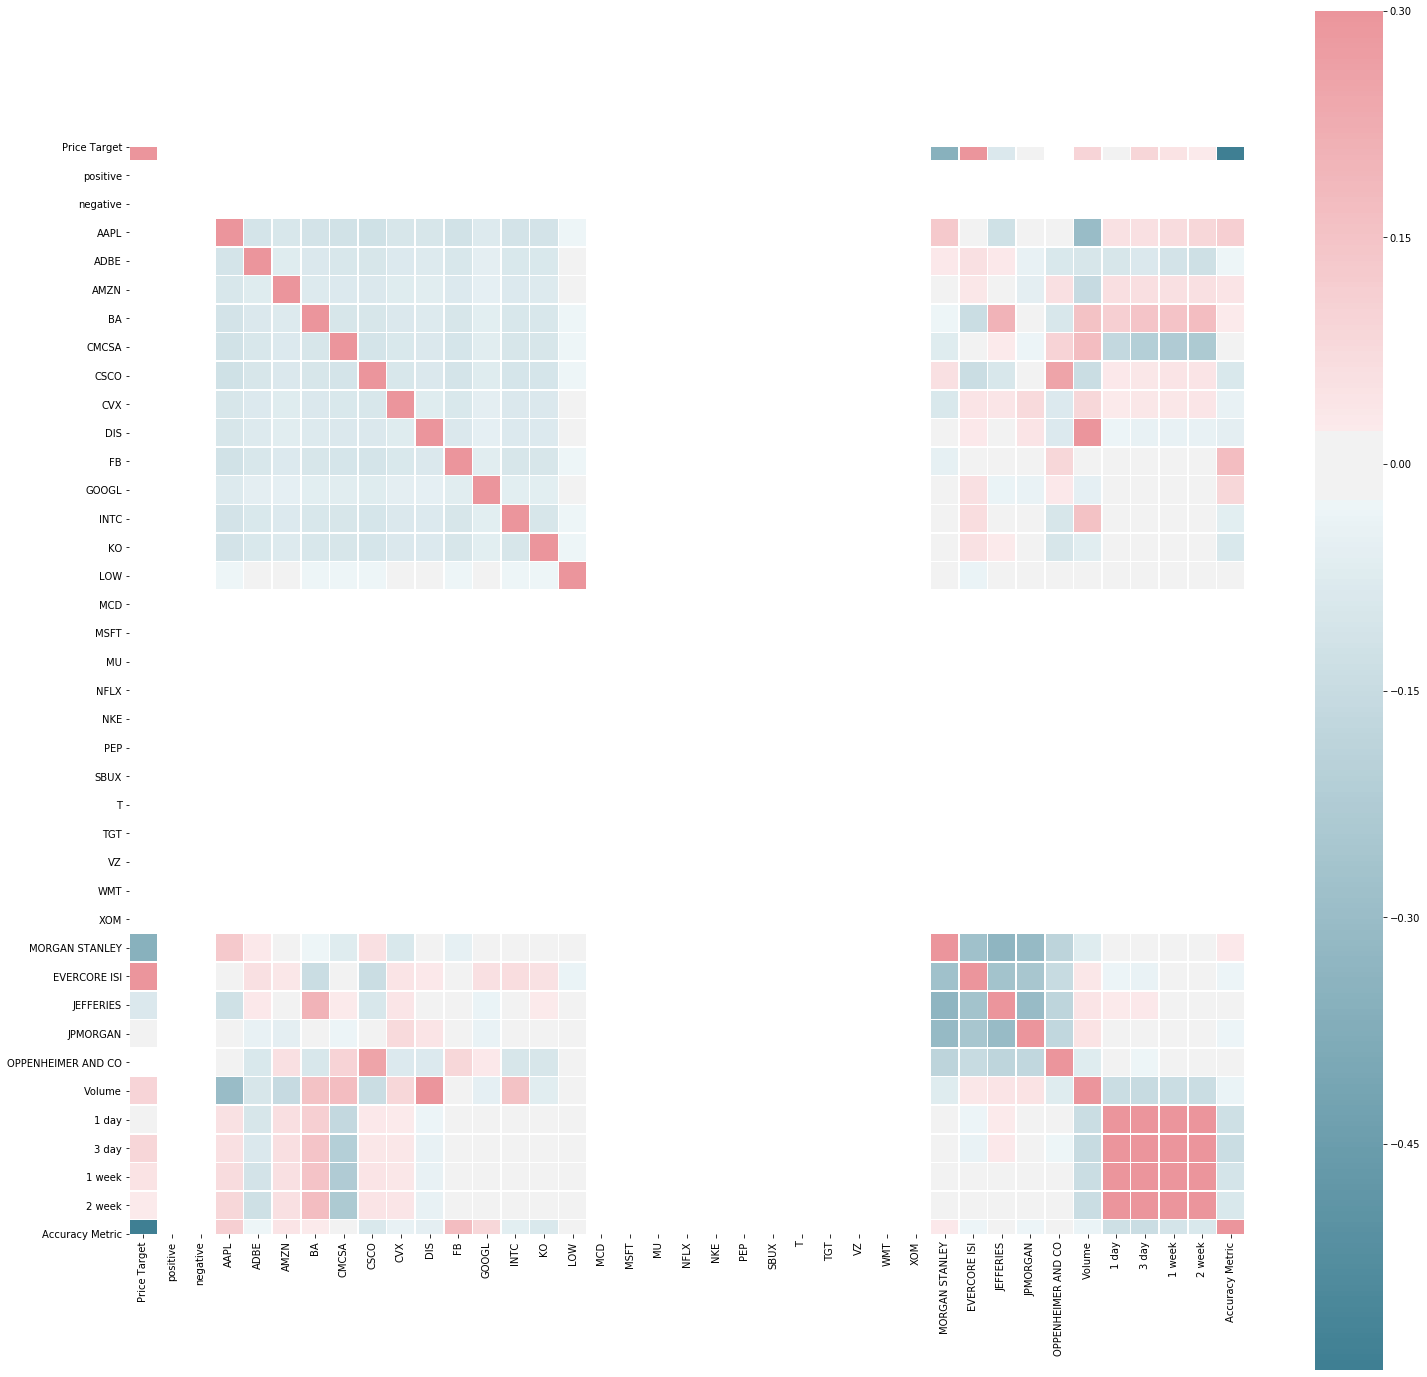

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5)

Drop one of each bank and ticker: needed to model properly

In [26]:
data.drop(['AAPL'], inplace = True, axis = 1 )
data.drop(['MORGAN STANLEY'], inplace = True, axis = 1)
data.head()

,positive,Date,negative,ADBE,AMZN,BA,CMCSA,CSCO,CVX,DIS,...,WMT,XOM,EVERCORE ISI,JEFFERIES,JPMORGAN,OPPENHEIMER AND CO,Volume,1 day,3 day,1 week
0,1,2019-11-21,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1609800,17.729980,17.729980,22.160004
1,1,2019-11-17,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1459700,3.619995,6.559997,22.160004
2,1,2019-11-15,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2011300,4.059997,0.619995,22.160004
3,1,2019-11-06,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2762400,1.660004,2.610016,4.430024
4,1,2019-11-04,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2790200,8.730011,10.209991,9.709991


Split the training and test sets